In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DS/dataCovid/HistoricalData_1666666405491.csv')

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/24/2022,$149.45,75981920,$147.185,$150.23,$146
1,10/21/2022,$147.27,86548610,$142.87,$147.8479,$142.649
2,10/20/2022,$143.39,64521990,$143.02,$145.89,$142.65
3,10/19/2022,$143.86,61758340,$141.69,$144.9492,$141.5
4,10/18/2022,$143.75,99136610,$145.49,$146.7,$140.61


In [4]:
df.tail(7)

,Date,Close/Last,Volume,Open,High,Low
245,11/02/2021,$150.02,69121990,$148.66,$151.57,$148.65
246,11/01/2021,$148.96,74588260,$148.985,$149.7,$147.8
247,10/29/2021,$149.8,124953200,$147.215,$149.94,$146.4128
248,10/28/2021,$152.57,100077900,$149.82,$153.165,$149.72
249,10/27/2021,$148.85,56094930,$149.36,$149.73,$148.49
250,10/26/2021,$149.32,60893400,$149.33,$150.84,$149.0101
251,10/25/2021,$148.64,50720560,$148.68,$149.37,$147.6211


In [12]:
df = df[['Date', 'Close/Last']]
df.head(7)

,Date,Close/Last
Date,,
2021-10-25,2021-10-25,148.64
2021-10-26,2021-10-26,149.32
2021-10-27,2021-10-27,148.85
2021-10-28,2021-10-28,152.57
2021-10-29,2021-10-29,149.80
2021-11-01,2021-11-01,148.96
2021-11-02,2021-11-02,150.02


In [6]:
df.dtypes

Date          object
Close/Last    object
dtype: object

In [7]:
df = df.replace({'\$':''}, regex = True)

In [8]:
df = df.astype({"Close/Last": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date          datetime64[ns]
Close/Last           float64
dtype: object

In [9]:
df.index = df['Date']

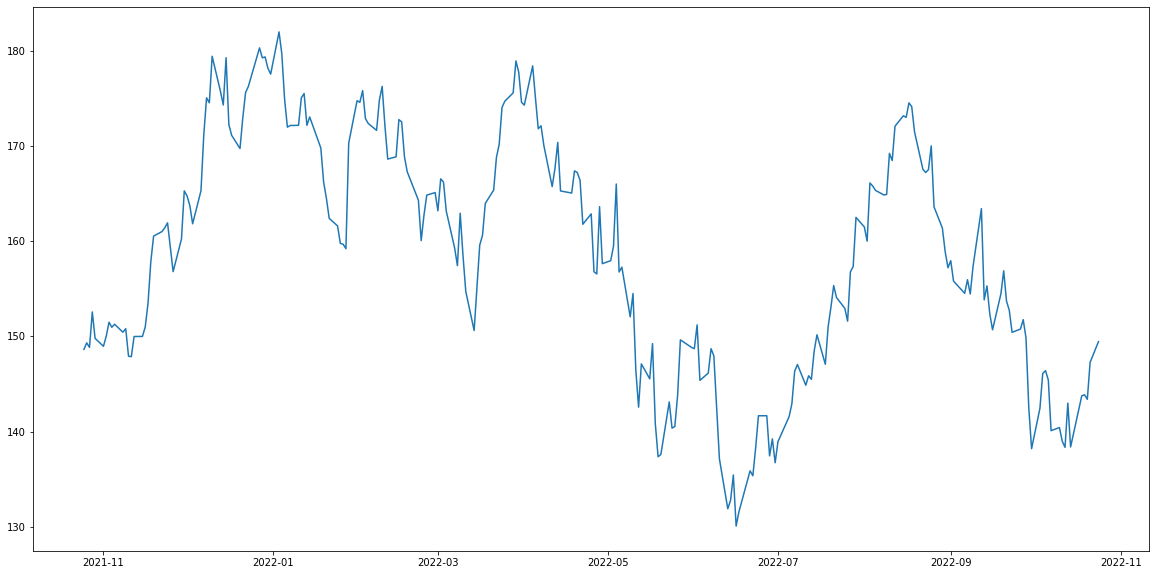

In [10]:
plt.plot(df["Close/Last"],label='Close Price history')

In [13]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close/Last'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close/Last"][i]=df["Close/Last"][i]
data.head()

,Date,Close/Last
0,2021-10-25 00:00:00,148.64
1,2021-10-26 00:00:00,149.32
2,2021-10-27 00:00:00,148.85
3,2021-10-28 00:00:00,152.57
4,2021-10-29 00:00:00,149.8


In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop("Date",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    lstm_model=Sequential()

lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 12s - loss: 0.0427 - 12s/epoch - 83ms/step


In [15]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 22ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


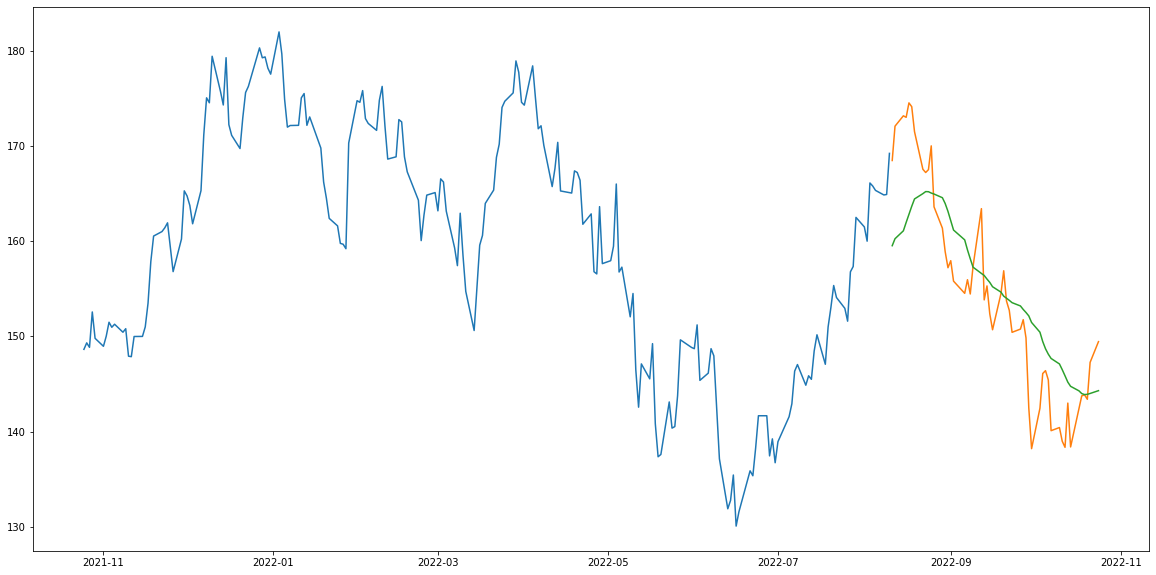

In [16]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close/Last"])
plt.plot(valid_data[['Close/Last',"Predictions"]])